## Import Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd 

In [2]:
# Visulization
import matplotlib.pyplot as plt 

import nltk 
from nltk.corpus import stopwords

In [3]:
data = pd.read_csv('IMDB Dataset.csv')

In [4]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### Read the data 

In [5]:
# Starting 10 columns
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
# Ending 10 columns
data.tail(10)

,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
data.shape

(50000, 2)

In [9]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [10]:
data.describe(include='all')

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [11]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [12]:
# Count the number of positive and negative reviews
positive_count = data[data['sentiment'] == 'positive'].shape[0]
negative_count = data[data['sentiment'] == 'negative'].shape[0]

print("Number of positive reviews:", positive_count)
print("Number of negative reviews:", negative_count)

Number of positive reviews: 25000
Number of negative reviews: 25000


In [13]:
# Calculate the length of each review and add it as a new column
data['review_length'] = data['review'].apply(len)

# Calculate the average length of reviews
average_length = data['review_length'].mean()

print("Average length of reviews:", average_length)

Average length of reviews: 1309.43102


## Check Null Values in the dataset

In [14]:
data.isnull()

,review,sentiment,review_length
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
49995,False,False,False
49996,False,False,False
49997,False,False,False
49998,False,False,False


In [15]:
data.isnull(). sum()

review           0
sentiment        0
review_length    0
dtype: int64

### Review Analysis

In [16]:
# Find the longest review
longest_review = data.loc[data['review'].apply(len).idxmax(), 'review']

print("The Longest review for Movies:")
print(longest_review)

The Longest review for Movies:
Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have p

In [17]:
# Find the shortest review
shortest_review = data.loc[data['review'].apply(len).idxmin(), 'review']

print("\n The Shortest review for Movies:")
print(shortest_review)


 The Shortest review for Movies:
Read the book, forget the movie!


## WordCloud

In [18]:
# Wordcloud

from wordcloud import WordCloud

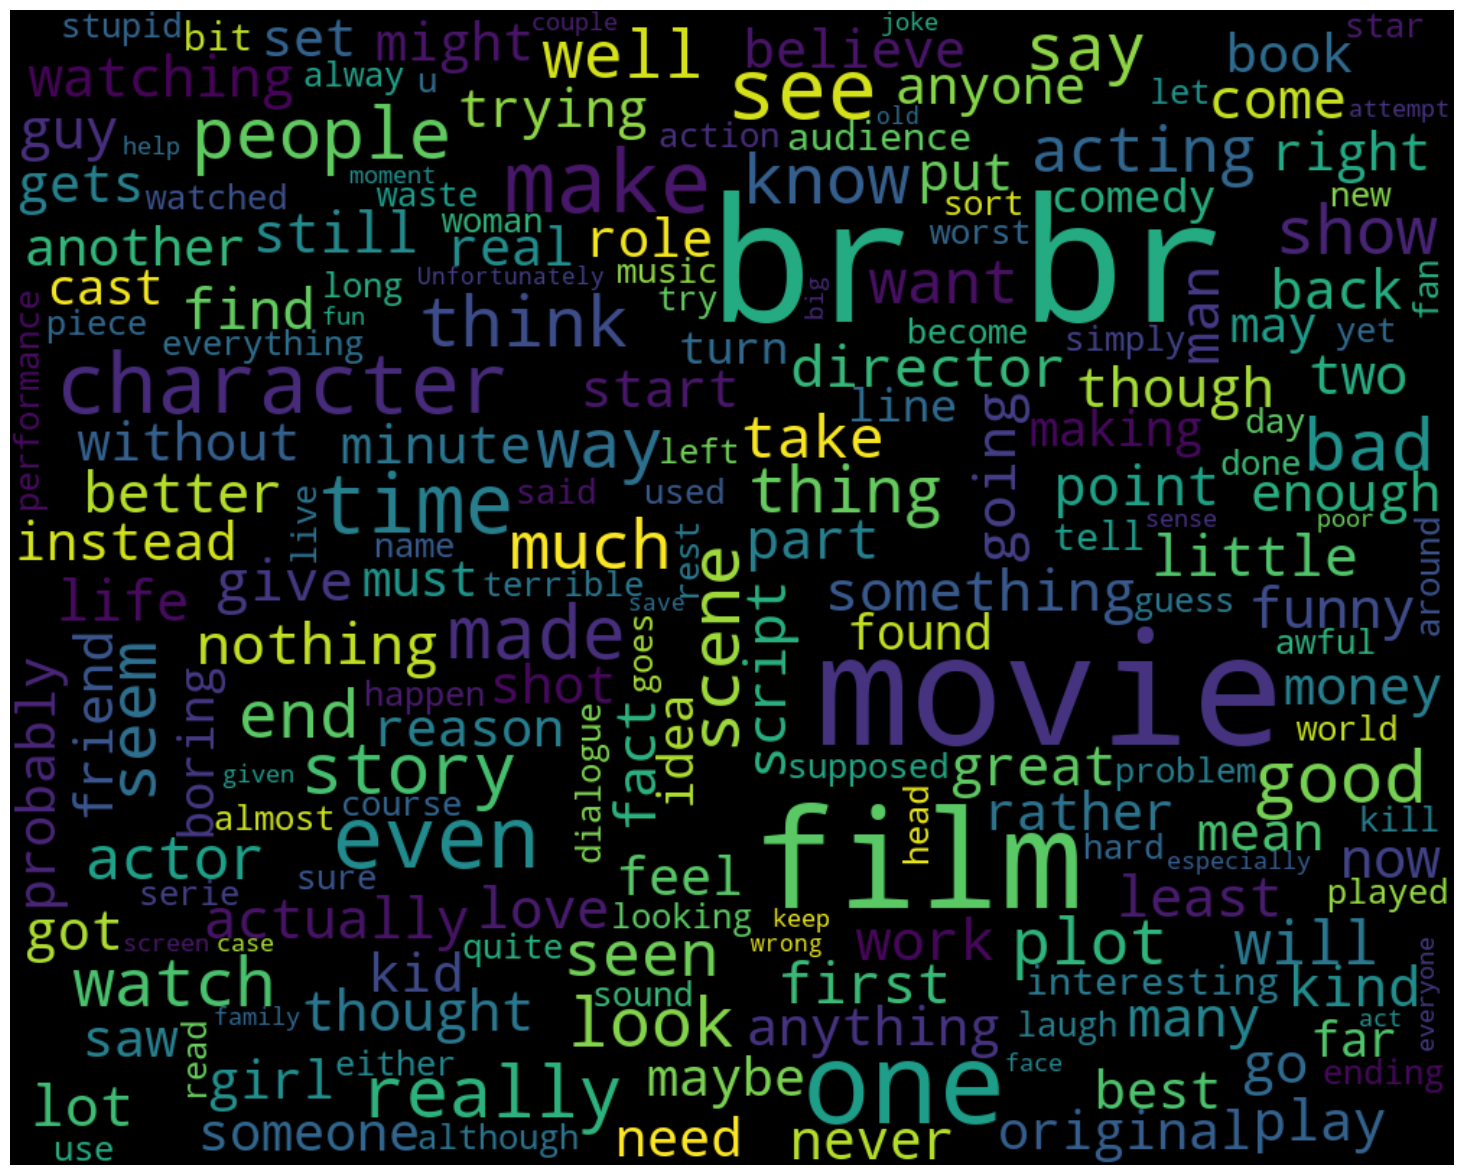

In [19]:
# Draw Wordcloud
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'negative'].astype(str))
wordcloud = WordCloud(height = 800, width = 1000, max_font_size = 120)
plt.figure(figsize = (20,15))
plt.imshow(wordcloud.generate(reviews), interpolation = 'bilinear')
plt.axis('off')
plt.show()

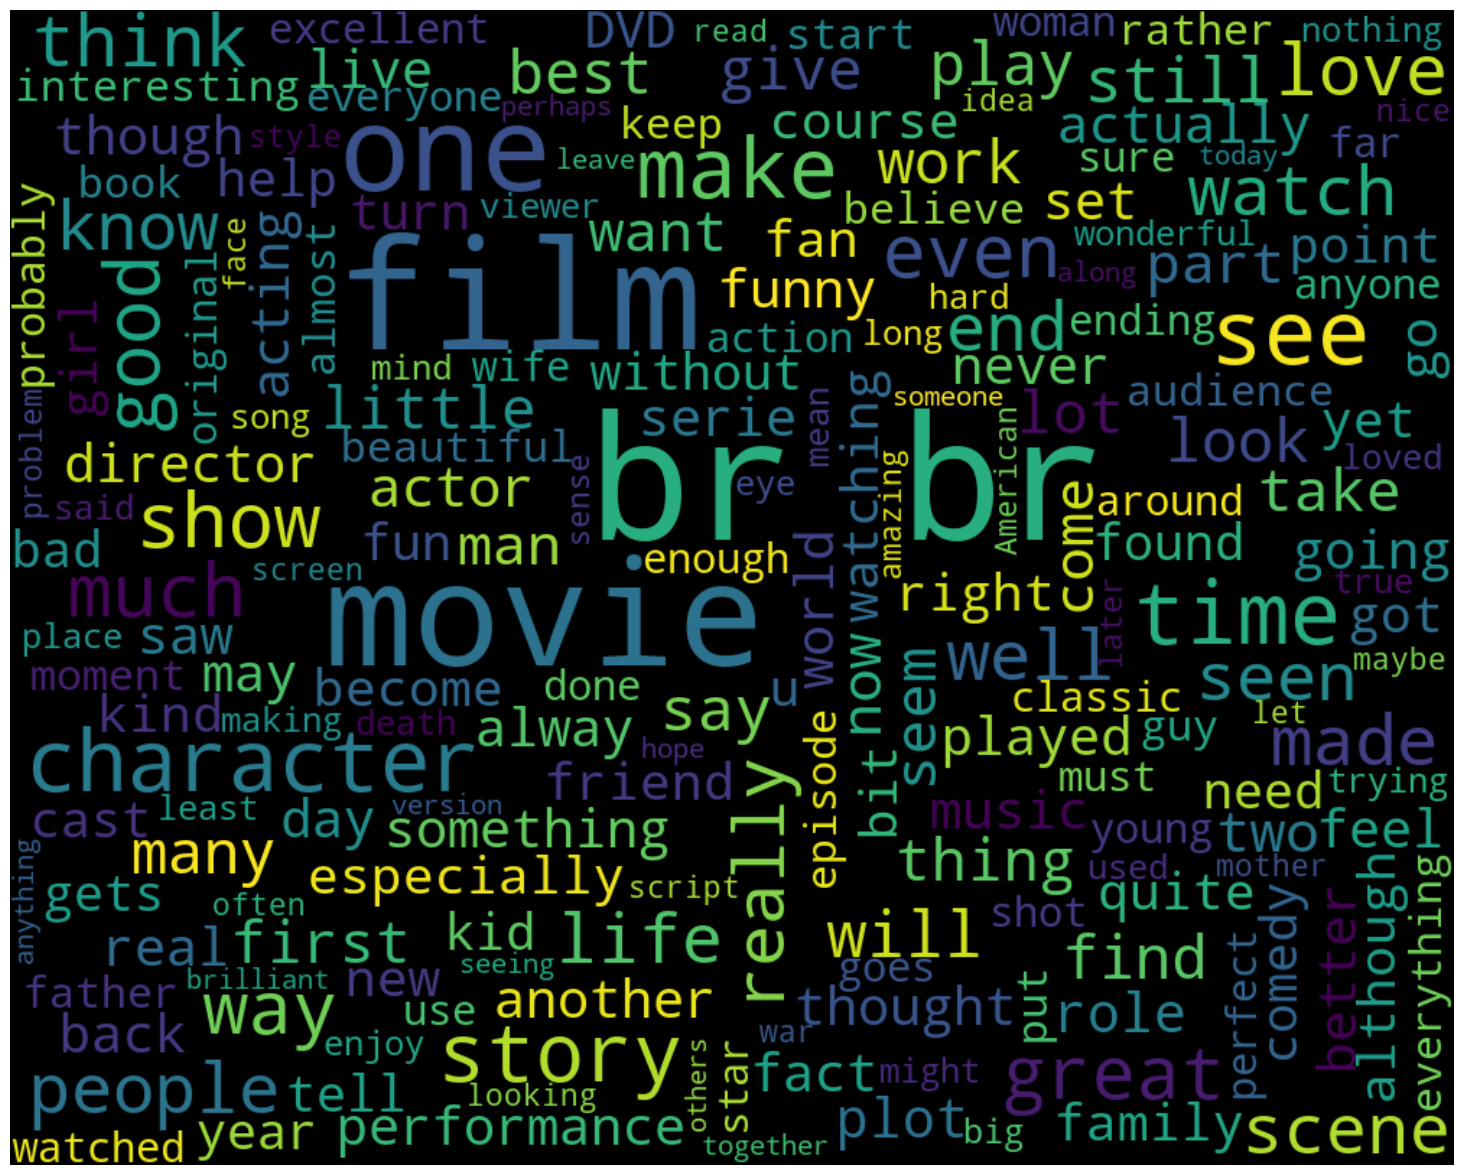

In [20]:
# Draw Wordcloud
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'positive'].astype(str))
wordcloud = WordCloud(height = 800, width = 1000, max_font_size = 120)
plt.figure(figsize = (20,15))
plt.imshow(wordcloud.generate(reviews), interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Conversion

In [21]:
# Convert all reviews to lowercase
data['review'] = data['review'].str.lower()

# Display the first few rows to verify the conversion
print(data['review'].head())

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object


In [22]:
import string

# Function to remove punctuation from a string
def remove_punctuation(text):
    return ''.join([char for char in text if char not in string.punctuation])

# Remove punctuation from reviews
data['review'] = data['review'].apply(remove_punctuation)

# Display the first few rows to verify the removal of punctuation
print(data['review'].head())

0    one of the other reviewers has mentioned that ...
1    a wonderful little production br br the filmin...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object


In [23]:
# Find the most common words in the positive reviews

In [24]:
from collections import Counter
from nltk.tokenize import word_tokenize
import string

# Filter the DataFrame to get only positive reviews
positive_reviews = data[data['sentiment'] == 'positive']['review']

# Tokenize and preprocess positive reviews
positive_reviews = positive_reviews.str.lower()  # Convert to lowercase
positive_reviews = positive_reviews.str.replace('[^\w\s]', '')  # Remove punctuation
positive_reviews = positive_reviews.apply(word_tokenize)  # Tokenize into words

# Flatten the list of words
all_words = [word for sublist in positive_reviews for word in sublist]

# Count the frequency of each word
word_freq = Counter(all_words)

# Get the 10 most common words
most_common_words = word_freq.most_common(10)

print("10 most common words in positive reviews:")
for word, freq in most_common_words:
    print(word, "-", freq)


10 most common words in positive reviews:
the - 339103
and - 174706
a - 163118
of - 151602
to - 130671
is - 111403
in - 98221
it - 76239
i - 71733
this - 68964


# Plot the distribution of sentiment scores

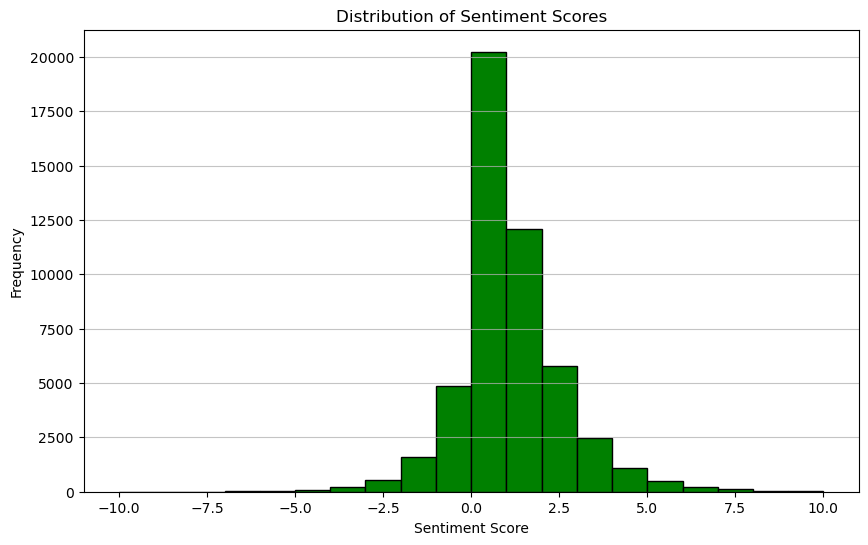

In [25]:

# Define positive and negative words
positive_words = {'good', 'great', 'excellent', 'positive'}  
negative_words = {'bad', 'poor', 'negative'}  

# Function to calculate sentiment score
def calculate_sentiment_score(text):
    tokens = word_tokenize(text.lower())  # Tokenize the text and convert to lowercase
    sentiment_score = sum(1 if token in positive_words else -1 if token in negative_words else 0 for token in tokens)
    return sentiment_score

# Calculate sentiment score for each review
data['sentiment_score'] = data['review'].apply(calculate_sentiment_score)

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(data['sentiment_score'], bins=range(-10, 11), edgecolor='black', color='green')  # Change color to green
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [26]:
# Sample 20 reviews
sample_reviews = data.sample(n=20, random_state=42)

# Specific words to search for
specific_words = ['good', 'bad', 'wonderful']

# Find reviews that contain specific words in the sampled subset
matching_reviews = sample_reviews[sample_reviews['review'].str.contains('|'.join(specific_words), case=False)]

# Display the matching reviews
for index, review in matching_reviews.iterrows():
    print(f"Review {index}: {review['review']}\n")


Review 9427: not many television shows appeal to quite as many different kinds of fans like farscape doesi know youngsters and 3040 years oldfans both male and female in as many different countries as you can think of that just adore this tv miniseries it has elements that can be found in almost every other show on tv character driven drama that could be from an australian soap opera yet in the same episode it has science fact  fiction that would give even the hardiest trekkie a run for his money in the brainbender stakes wormhole theory time travel in true equational formmagnificent it embraces cultures from all over the map as the possibilities are endless having multiple stars and therefore thousands of planets to choose frombr br with such a broad scope it would be expected that nothing would be able to keep up the illusion for long but here is where farscape really comes into its own elementit succeeds where all others have failed especially the likes of star trek a universe with 

## Model Training

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)

In [28]:
reviews = cv.fit_transform(data['review']).toarray()

In [29]:
data['sentiment'] = data['sentiment'].replace(['positive', 'negative'], [1,0])

In [30]:
data['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

### 1. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
reviews_train, reviews_test, senti_train, senti_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [33]:
LR = LogisticRegression()

In [34]:
LR.fit(reviews_train, senti_train)

LogisticRegression()

In [35]:
predict = LR.predict(reviews_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [37]:
# Calculate evaluation metrics
lr_accuracy = accuracy_score(senti_test, predict)
lr_precision = precision_score(senti_test, predict)
lr_recall = recall_score(senti_test, predict)
lr_f1 = f1_score(senti_test, predict)
lr_roc_auc = roc_auc_score(senti_test, predict)


In [38]:
print("Accuracy of Logistic Regression:", lr_accuracy)
print("Precision of Logistic Regression:", lr_precision)
print("Recall of Logistic Regression:", lr_recall)
print("F1-Score of Logistic Regression:", lr_f1)
print("ROC AUC Score of Logistic Regression:", lr_roc_auc)


Accuracy of Logistic Regression: 0.8942
Precision of Logistic Regression: 0.8913827655310621
Recall of Logistic Regression: 0.8960515713134569
F1-Score of Logistic Regression: 0.8937110709262607
ROC AUC Score of Logistic Regression: 0.894213236014155


In [39]:
lr_conf_matrix = confusion_matrix(senti_test, predict)

print("Confusion Matrix:")
print(lr_conf_matrix)


Confusion Matrix:
[[4494  542]
 [ 516 4448]]


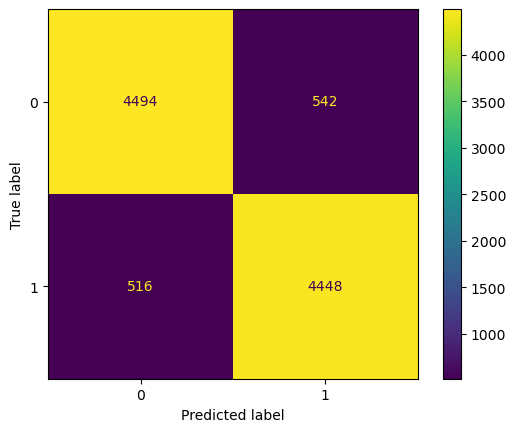

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
lr_conf_matrix = confusion_matrix(senti_test, predict, labels= LR.classes_)
display = ConfusionMatrixDisplay(confusion_matrix= lr_conf_matrix, display_labels= LR.classes_)
display.plot()
plt.show()

### 2. Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
# Instantiate Decision Tree Classifier
DT = DecisionTreeClassifier()

In [43]:
# Train Decision Tree Classifier
DT.fit(reviews_train, senti_train)

DecisionTreeClassifier()

In [44]:
# Make predictions
DT_predict = DT.predict(reviews_test)

In [45]:
# Calculate evaluation metrics for decision tree classifier
dt_accuracy = accuracy_score(senti_test, DT_predict)
dt_precision = precision_score(senti_test, DT_predict)
dt_recall = recall_score(senti_test, DT_predict)
dt_f1 = f1_score(senti_test, DT_predict)
dt_roc_auc = roc_auc_score(senti_test, DT_predict)
dt_conf_matrix = confusion_matrix(senti_test, DT_predict)

print("Decision Tree Classifier Performance:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-Score:", dt_f1)
print("ROC AUC Score:", dt_roc_auc)
print("Confusion Matrix:")
print(dt_conf_matrix)


Decision Tree Classifier Performance:
Accuracy: 0.7047
Precision: 0.7044114657450702
Recall: 0.6980257856567285
F1-Score: 0.7012040878275828
ROC AUC Score: 0.7046522891746709
Confusion Matrix:
[[3582 1454]
 [1499 3465]]


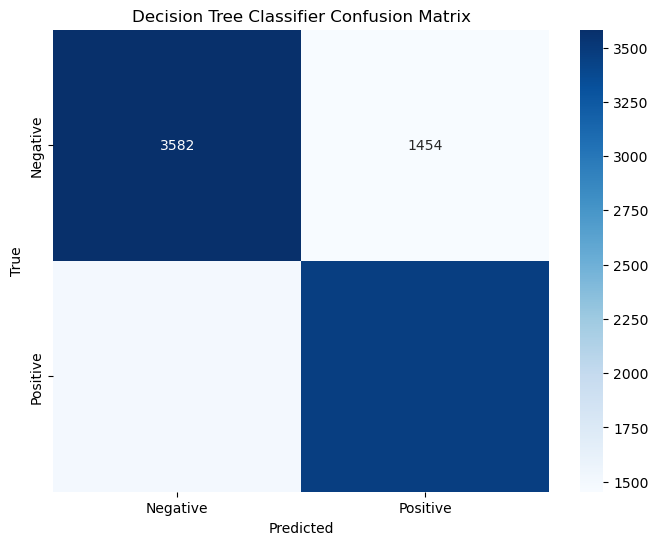

In [46]:
import seaborn as sns

# Plot confusion matrix for decision tree classifier
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()


## Model Comparison

In [47]:
# Evaluation metrics for logistic regression
logistic_metrics = {
    "Accuracy": lr_accuracy,
    "Precision": lr_precision,
    "Recall": lr_recall,
    "F1-Score": lr_f1,
    "ROC AUC": lr_roc_auc
}

# Evaluation metrics for decision tree classifier
decision_tree_metrics = {
    "Accuracy": dt_accuracy,
    "Precision": dt_precision,
    "Recall": dt_recall,
    "F1-Score": dt_f1,
    "ROC AUC": dt_roc_auc
}

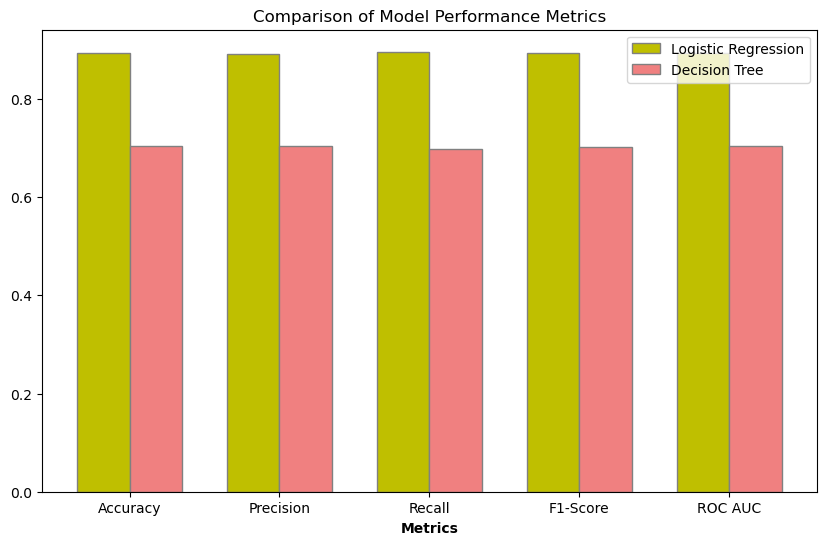

In [48]:
# Metric names
metric_names = list(logistic_metrics.keys())

# Metric values for logistic regression
logistic_values = list(logistic_metrics.values())
# Metric values for decision tree classifier
decision_tree_values = list(decision_tree_metrics.values())

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
bar_width = 0.35

# Set position of bar on X axis
r1 = range(len(metric_names))
r2 = [x + bar_width for x in r1]

# Plot bars
plt.bar(r1, logistic_values, color='y', width=bar_width, edgecolor='grey', label='Logistic Regression')
plt.bar(r2, decision_tree_values, color='lightcoral', width=bar_width, edgecolor='grey', label='Decision Tree')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(metric_names))], metric_names)

# Create legend & Show graphic
plt.legend()
plt.title('Comparison of Model Performance Metrics')
plt.show()


This shows Logistic Regression algorithm provides better efficiency compared to the Decision Tree algorithm

## Advanced Algorithms

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Instantiate Random Forest Classifier
RF = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

In [51]:
# Train Random Forest Classifier
RF.fit(reviews_train, senti_train)

RandomForestClassifier(random_state=42)

In [52]:
# Make predictions
RF_predict = RF.predict(reviews_test)

In [53]:
# Calculate evaluation metrics for Random Forest Classifier
rf_accuracy = accuracy_score(senti_test, RF_predict)
rf_precision = precision_score(senti_test, RF_predict)
rf_recall = recall_score(senti_test, RF_predict)
rf_f1 = f1_score(senti_test, RF_predict)
rf_roc_auc = roc_auc_score(senti_test, RF_predict)
rf_conf_matrix = confusion_matrix(senti_test, RF_predict)

print("Random Forest Classifier Performance:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)
print("ROC AUC Score:", rf_roc_auc)
print("Confusion Matrix:")
print(rf_conf_matrix)


Random Forest Classifier Performance:
Accuracy: 0.8439
Precision: 0.8483111566018424
Recall: 0.8348106365834005
F1-Score: 0.8415067519545131
ROC AUC Score: 0.8438350244076652
Confusion Matrix:
[[4295  741]
 [ 820 4144]]


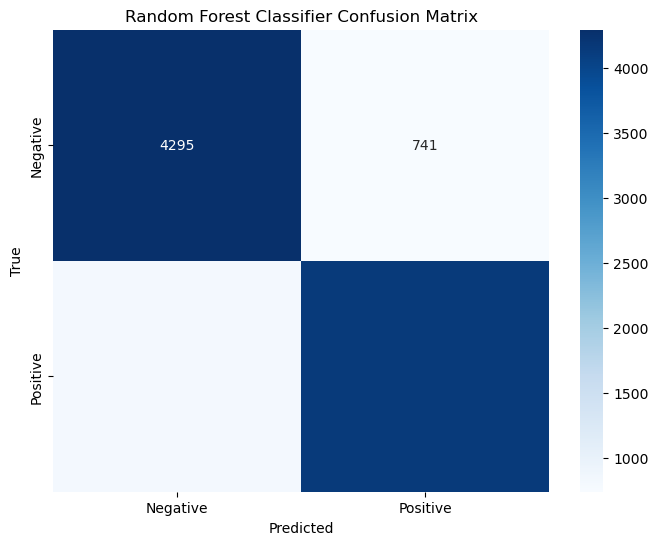

In [54]:
# Plot confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()


## Model Comparison for all algorithm

In [55]:
# Evaluation metrics for Random Forest
rf_metrics = {
    "Accuracy": rf_accuracy,
    "Precision": rf_precision,
    "Recall": rf_recall,
    "F1-Score": rf_f1,
    "ROC AUC": rf_roc_auc
}

In [56]:
# Metric values for Random Forest
random_forest_values = list(rf_metrics.values())

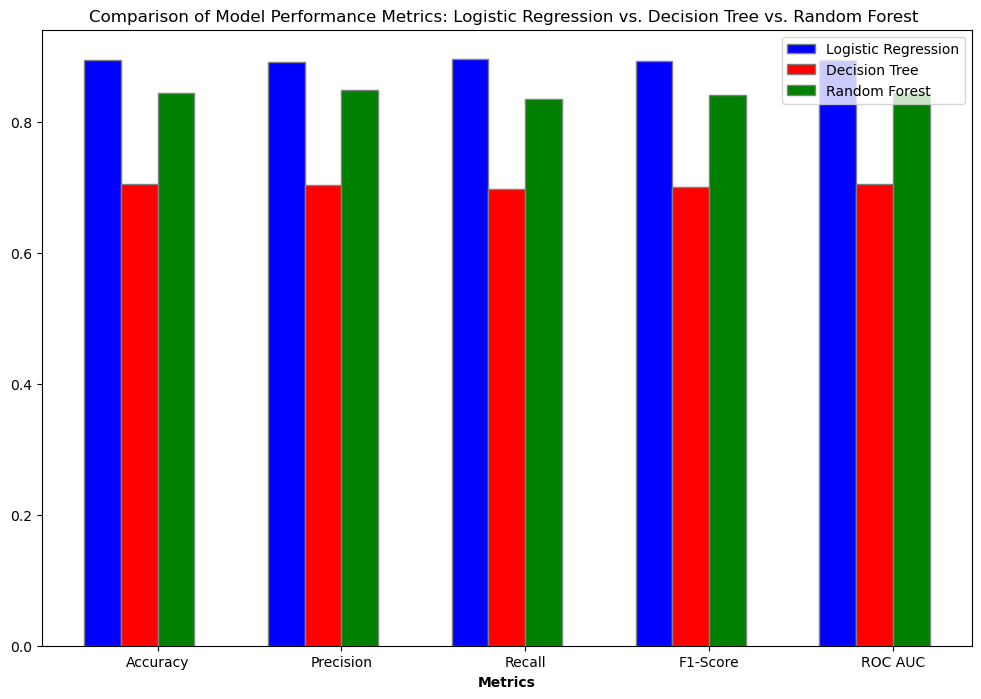

In [57]:
# Metric names
metric_names = list(logistic_metrics.keys())

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bars
bar_width = 0.2

# Set position of bars on X axis
r1 = np.arange(len(metric_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot bars
plt.bar(r1, logistic_values, color='b', width=bar_width, edgecolor='grey', label='Logistic Regression')
plt.bar(r2, decision_tree_values, color='r', width=bar_width, edgecolor='grey', label='Decision Tree')
plt.bar(r3, random_forest_values, color='g', width=bar_width, edgecolor='grey', label='Random Forest')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(metric_names))], metric_names)

# Create legend & Show graphic
plt.legend()
plt.title('Comparison of Model Performance Metrics: Logistic Regression vs. Decision Tree vs. Random Forest ')
plt.show()


According to all comparisons of different models, the Logistic Regression model performs best among all.

In [58]:
LR = LogisticRegression()

In [59]:
LR.fit(reviews_train, senti_train)

LogisticRegression()

## Deployment

In [60]:
import pickle as pk 

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [62]:
pk.dump(LR, open('model.pkl', 'wb'))